# Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
img_w, img_h = 224, 224
batch = 32
dataset_path = "/content/drive/MyDrive/Augmentation1/Augmentation"


In [ ]:
# Using rescale, shear_range, zoom_range, horizontal_flip for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 split
)

# Only rescale for validation data (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

# Training generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_w, img_h),
    batch_size=batch,
    class_mode='categorical',
    subset='training'  # Specify this is for training set
)

# Validations generators
validation_generator = validation_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_w, img_h),
    batch_size=batch,
    class_mode='categorical',
    subset='validation'  # Specify this is for validation set
)

Found 11397 images belonging to 4 classes.
Found 2848 images belonging to 4 classes.


In [ ]:
num_classes = train_generator.num_classes
num_classes

4

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Loads Xception model, excluding tops layer
base_model = Xception(weights='imagenet', include_top=False)
# Adds top layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)  # Additional fully-connected layer with 64 units
x = Dense(256, activation='relu')(x)  # Additional fully-connected layer with 256 units
predictions = Dense(num_classes, activation='softmax')(x)
# Creates the complete models
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:


# Compiled the  Xception_model again (always after making any changes)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch,
    epochs=16,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch
)


c:\Users\admin\anaconda3\envs\malak1\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/16
356/356 [==============================] - 268s 738ms/step - loss: 0.2791 - accuracy: 0.9064 - val_loss: 2.8624 - val_accuracy: 0.6756
Epoch 2/16
356/356 [==============================] - 66s 184ms/step - loss: 0.1595 - accuracy: 0.9502 - val_loss: 0.0950 - val_accuracy: 0.9712
Epoch 3/16
356/356 [==============================] - 66s 185ms/step - loss: 0.1092 - accuracy: 0.9657 - val_loss: 0.1687 - val_accuracy: 0.9435
Epoch 4/16
356/356 [==============================] - 66s 185ms/step - loss: 0.0942 - accuracy: 0.9716 - val_loss: 0.1835 - val_accuracy: 0.9505
Epoch 5/16
356/356 [==============================] - 66s 184ms/step - loss: 0.0842 - accuracy: 0.9746 - val_loss: 0.1323 - val_accuracy: 0.9593
Epoch 6/16
356/356 [==============================] - 66s 185ms/step - loss: 0.0853 - accuracy: 0.9725 - val_loss: 0.7689 - val_accuracy: 0.8754
Epoch 7/16
356/356 [==============================] - 66s 186ms/step - loss: 0.0590 - accuracy: 0.9835 - val_loss: 0.1601 - val_a

In [ ]:
model.save_weights(r"/content/drive/MyDrive/model_weights/Xception_Latest_v1.h5")


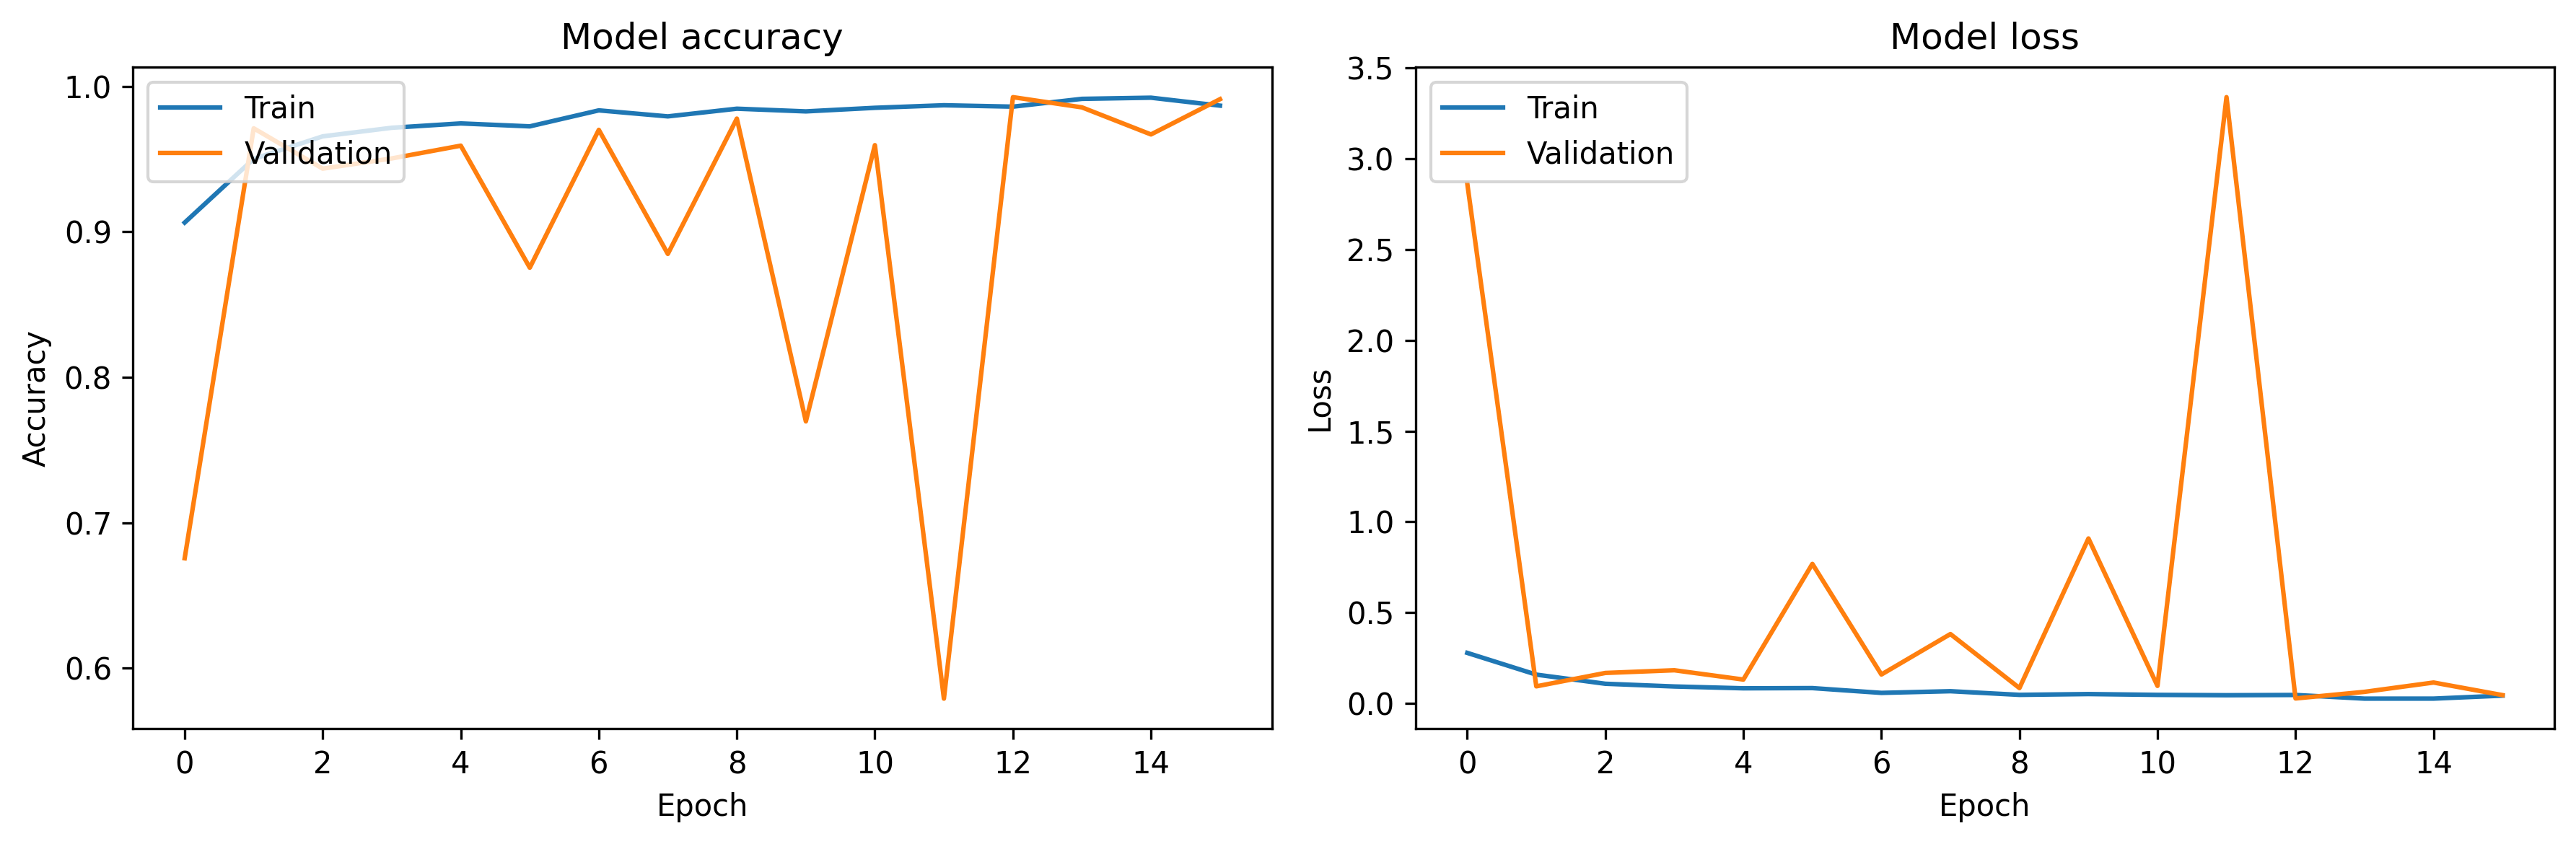

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4) ,dpi=300)

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

89/89 [==============================] - 4s 38ms/step


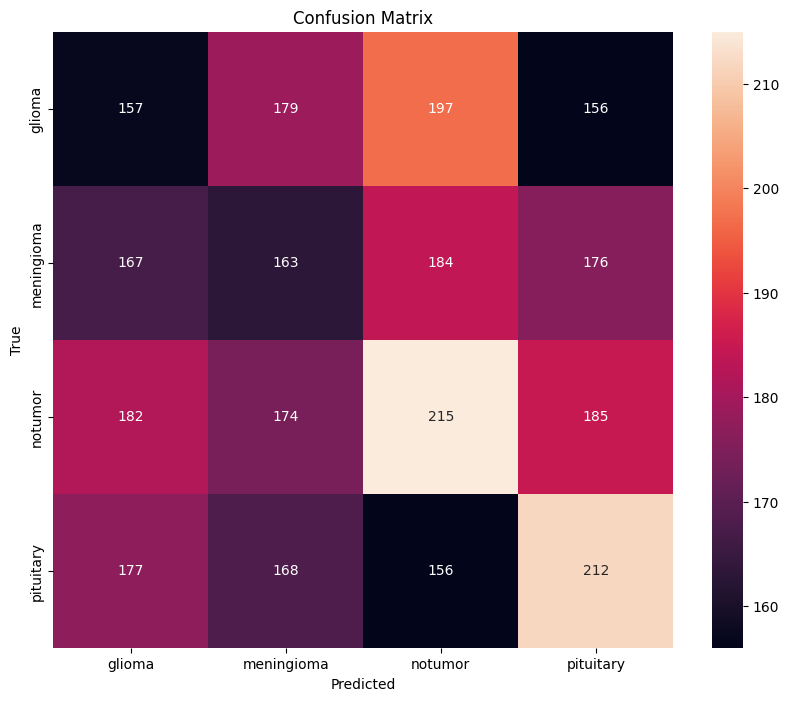

Classification Report
              precision    recall  f1-score   support

      glioma       0.23      0.23      0.23       689
  meningioma       0.24      0.24      0.24       690
     notumor       0.29      0.28      0.29       756
   pituitary       0.29      0.30      0.29       713

    accuracy                           0.26      2848
   macro avg       0.26      0.26      0.26      2848
weighted avg       0.26      0.26      0.26      2848



In [ ]:
import seaborn as sns
# Obtain true labels and predictions
validation_generator.reset()
Y_pred = model.predict(validation_generator, validation_generator.n // batch + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Creates confusions matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plots confusions matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classifications reports
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=class_labels))

In [ ]:
class_indices = train_generator.class_indices
classes = list(class_indices.keys())

In [ ]:
images, labels = next(validation_generator)

In [ ]:
len(labels)

32

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
num_images = 10

In [ ]:
images, labels = next(validation_generator)
images = images[:num_images]
labels = labels[:num_images]

In [ ]:
def get_predictions(generator, model, num_images):
    images, labels = next(generator)
    images = images[:num_images]
    labels = labels[:num_images]
    predictions = model.predict(images)
    actual_classes = [classes[np.argmax(label)] for label in labels]
    predicted_classes = [classes[np.argmax(prediction)] for prediction in predictions]
    return images, actual_classes, predicted_classes

1/1 [==============================] - 0s 20ms/step


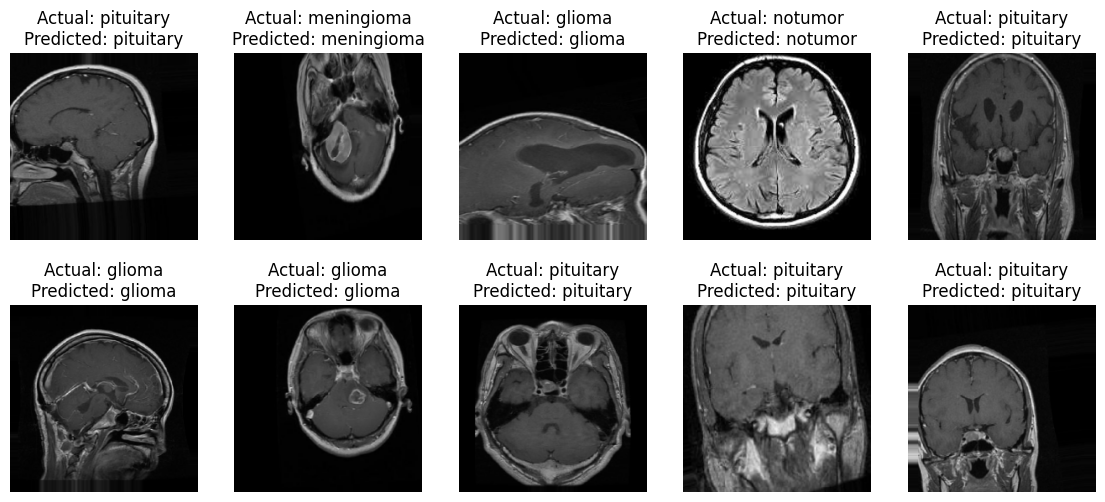

In [ ]:
num_images = 10
images, actual_classes, predicted_classes = get_predictions(train_generator, model, num_images)

# Plots the images with their actual and predicteds class names
plt.figure(figsize=(14,6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()

# Xception Model Evaluation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Imports the Xception_model from TensorFlow Kiras
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_w, img_h = 224, 224
batch = 32
dataset_path = "/content/drive/MyDrive/Augmentation1/Augmentation"

In [ ]:
# Using rescale, shear_range, zoom_range, horizontal_flip for training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 split
)

# Only rescale for validation data (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

# Traininng generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_w, img_h),
    batch_size=batch,
    class_mode='categorical',
    subset='training'
)

# Validations generators
validation_generator = validation_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_w, img_h),
    batch_size=batch,
    class_mode='categorical',
    subset='validation'
)

Found 11397 images belonging to 4 classes.
Found 2848 images belonging to 4 classes.


In [ ]:
num_classes = train_generator.num_classes
num_classes

4

In [ ]:
from tensorflow.keras.models import load_model

path = r"/content/drive/MyDrive/model_weights/Xception_Latest_v1.h5"
model = load_model(path)


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
class_indices = train_generator.class_indices
classes = list(class_indices.keys())

In [ ]:
images, labels = next(validation_generator)

In [ ]:
len(labels)

32

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
num_images =10
images, labels = next(validation_generator)
images = images[:num_images]
labels = labels[:num_images]

In [ ]:
def get_predictions(generator, model, num_images):
    images, labels = next(generator)
    images = images[:num_images]
    labels = labels[:num_images]
    predictions = model.predict(images)
    actual_classes = [classes[np.argmax(label)] for label in labels]
    predicted_classes = [classes[np.argmax(prediction)] for prediction in predictions]
    return images, actual_classes, predicted_classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


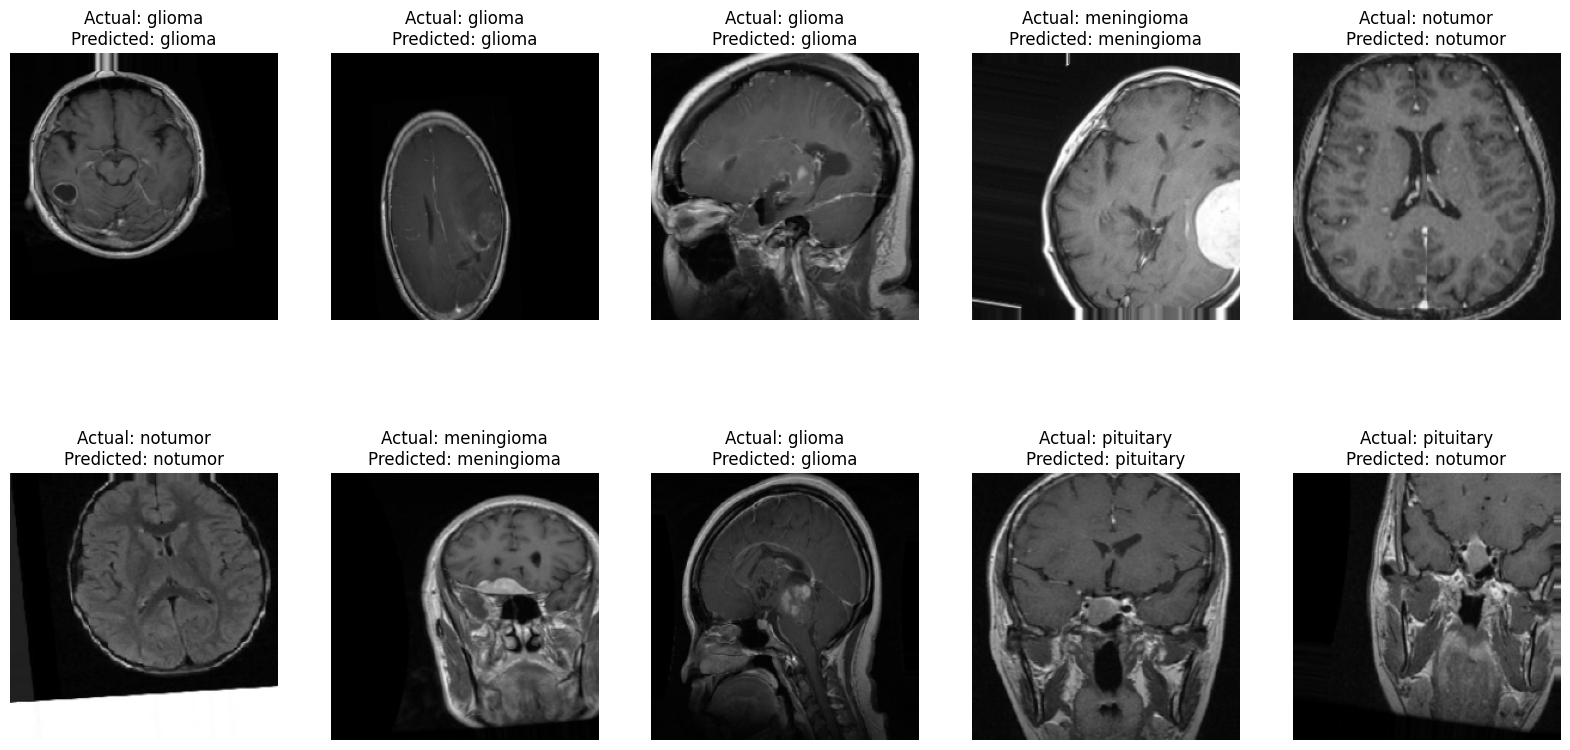

In [ ]:
num_images = 10
images, actual_classes, predicted_classes = get_predictions(train_generator, model, num_images)

# Plots the image with their actual and predicteds class names
plt.figure(figsize=(20, 10))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()

In [ ]:
images, labels = next(validation_generator)

In [ ]:
images= images[1,:,:,:]

In [ ]:
images.shape

(224, 224, 3)

In [ ]:
import tensorflow as tf
import cv2
import numpy as np

# Loads the images
path = r"/content/drive/MyDrive/Augmentation1/Augmentation/pituitary/Te-piTr_0005.jpg"
img = cv2.imread(path)
img = cv2.resize(img, (224, 224))

# Converts the images to a numpy arrays and normalize it
img = np.array(img) / 255.0

# Expands dimension to match the input shape expected by the model (batch, height, width, channels)
img = np.expand_dims(img, axis=0)

predictions = model.predict(img)


predicted_label = np.argmax(predictions, axis=-1)
predicted_index = np.argmax(predictions, axis=-1)[0]
# Get class indices from the generator
class_indices = validation_generator.class_indices


class_names = {v: k for k, v in class_indices.items()}

# Get the predicted class name
predicted_class = class_names[predicted_index]

print(f'Predicted Label Index: {predicted_index}')
print(f'Predicted Class Name: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Label Index: 3
Predicted Class Name: pituitary
